<a href="https://colab.research.google.com/github/ritiksp2411/5thsem/blob/master/MP5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

tf.compat.v1.disable_eager_execution()

import tempfile
import zipfile
import os
import h5py
import numpy as np
import glob
from numpy import linalg as LA
from scipy.stats import rankdata
from shutil import copyfile, move


batch_size = 128
num_classes = 10
epochs = 10

# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], img_rows*img_cols)
x_test = x_test.reshape(x_test.shape[0], img_rows* img_cols)
input_shape = (img_rows* img_cols, )

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 784)
60000 train samples
10000 test samples


In [2]:
! pip uninstall -y tensorflow
! pip uninstall -y tf-nightly
! pip install -U tf-nightly-gpu
! pip install tensorflow-model-optimization

Found existing installation: tensorflow 2.6.0
Uninstalling tensorflow-2.6.0:
  Successfully uninstalled tensorflow-2.6.0
     |████████████████████████████████| 488.6 MB 17 kB/s 
     |████████████████████████████████| 1.3 MB 43.8 MB/s 
     |████████████████████████████████| 5.8 MB 45.9 MB/s 
     |████████████████████████████████| 462 kB 60.2 MB/s 
     |████████████████████████████████| 2.1 MB 59.3 MB/s 
     |████████████████████████████████| 13.4 MB 238 kB/s 


     |████████████████████████████████| 213 kB 5.2 MB/s 


In [4]:
from tensorflow.python.framework import ops
ops.reset_default_graph()
l = tf.keras.layers

model = tf.keras.Sequential([
    l.Dense(1000, input_shape=input_shape),
    l.Dense(1000, activation='relu'),
    l.Dense(500, activation='relu'),
    l.Dense(200, activation='relu'),
    l.Dense(num_classes, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1000)              785000    
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dense_2 (Dense)              (None, 500)               500500    
_________________________________________________________________
dense_3 (Dense)              (None, 200)               100200    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                2010      
Total params: 2,388,710
Trainable params: 2,388,710
Non-trainable params: 0
_________________________________________________________________


In [5]:
%load_ext tensorboard
import tensorboard

In [6]:
logdir = tempfile.mkdtemp()
print('Writing training logs to ' + logdir)
%tensorboard --logdir={logdir}

Writing training logs to /tmp/tmpwhieho1_


ERROR: Failed to launch TensorBoard (exited with 1).
Contents of stderr:
2021-10-22 07:10:52.029381: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected

NOTE: Using experimental fast data loading logic. To disable, pass
    "--load_fast=false" and report issues on GitHub. More details:
    https://github.com/tensorflow/tensorboard/issues/4784

Traceback (most recent call last):
  File "/usr/local/bin/tensorboard", line 8, in <module>
    sys.exit(run_main())
  File "/usr/local/lib/python3.7/dist-packages/tensorboard/main.py", line 46, in run_main
    app.run(tensorboard.main, flags_parser=tensorboard.configure)
  File "/usr/local/lib/python3.7/dist-packages/absl/app.py", line 303, in run
    _run_main(main, args)
  File "/usr/local/lib/python3.7/dist-packages/absl/app.py", line 251, in _run_main
    sys.exit(main(argv))
  File "/usr/local/lib/python3.7/dist-packages/tensorboard/program.py", line 276, in 

In [7]:
callbacks = [tf.keras.callbacks.TensorBoard(log_dir=logdir, profile_batch=0)]

model.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    optimizer='adam',
    metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=10,
          verbose=1,
          callbacks=callbacks,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
59904/60000 [============================>.] - ETA: 0s - loss: 0.2138 - accuracy: 0.9357

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  raise NotImplementedError(


60000/60000 [==============================] - 23s 382us/sample - loss: 0.2136 - accuracy: 0.9358 - val_loss: 0.1396 - val_accuracy: 0.9589
Epoch 2/10
60000/60000 [==============================] - 23s 380us/sample - loss: 0.1083 - accuracy: 0.9663 - val_loss: 0.1062 - val_accuracy: 0.9663
Epoch 3/10
60000/60000 [==============================] - 23s 375us/sample - loss: 0.0825 - accuracy: 0.9739 - val_loss: 0.1186 - val_accuracy: 0.9631
Epoch 4/10
60000/60000 [==============================] - 23s 376us/sample - loss: 0.0713 - accuracy: 0.9783 - val_loss: 0.0915 - val_accuracy: 0.9725
Epoch 5/10
60000/60000 [==============================] - 23s 377us/sample - loss: 0.0593 - accuracy: 0.9816 - val_loss: 0.1128 - val_accuracy: 0.9703
Epoch 6/10
60000/60000 [==============================] - 22s 374us/sample - loss: 0.0576 - accuracy: 0.9819 - val_loss: 0.0870 - val_accuracy: 0.9752
Epoch 7/10
60000/60000 [==============================] - 23s 378us/sample - loss: 0.0453 - accuracy: 0.9

In [8]:
#Save model
_, model_file = tempfile.mkstemp('.h5')
tf.keras.models.save_model(model, model_file, include_optimizer=False)

# Weight pruning

In [9]:
for k in [.25, .50, .60, .70, .80, .90, .95, .97, .99]:
  copyfile(model_file,"/tmp/orig.h5")
  f = h5py.File("/tmp/orig.h5",'r+')
  ranks = {}
  for l in list(f['model_weights'])[:-1]:
#   for l in ['dense', 'dense_1', 'dense_2', 'dense_3']:
    data = f['model_weights'][l][l]['kernel:0']
    w = np.array(data)
    ranks[l]=(rankdata(np.abs(w),method='dense') - 1).astype(int).reshape(w.shape)
    lower_bound_rank = np.ceil(np.max(ranks[l])*k).astype(int)
    ranks[l][ranks[l]<=lower_bound_rank] = 0
    ranks[l][ranks[l]>lower_bound_rank] = 1
    w = w*ranks[l]
    data[...] = w
  f.close()
  move("/tmp/orig.h5","/tmp/weight_"+str(k)+".h5")

# Neuron pruning

In [10]:
for k in [.25, .50, .60, .70, .80, .90, .95, .97, .99]:
  copyfile(model_file,"/tmp/orig.h5")
  f = h5py.File("/tmp/orig.h5",'r+')
  ranks = {}
  for l in list(f['model_weights'])[:-1]:
#   for l in ['dense', 'dense_1', 'dense_2', 'dense_3']:
    data = f['model_weights'][l][l]['kernel:0']
    w = np.array(data)
    norm = LA.norm(w,axis=0)
    norm = np.tile(norm,(w.shape[0],1))
    ranks[l] = (rankdata(norm,method='dense') - 1).astype(int).reshape(norm.shape)
    lower_bound_rank = np.ceil(np.max(ranks[l])*k).astype(int)
    ranks[l][ranks[l]<=lower_bound_rank] = 0
    ranks[l][ranks[l]>lower_bound_rank] = 1
    w = w*ranks[l]
    data[...] = w
  f.close()
  move("/tmp/orig.h5","/tmp/neuron"+str(k)+".h5")

In [11]:
files_weights = glob.glob('/tmp/weight*.h5')
files_weights.sort()
files_neuron = glob.glob('/tmp/neuron*.h5')
files_neuron.sort()
  
accuracy_weights = []
accuracy_neurons = []

for f in files_weights:
  restored_model = tf.keras.models.load_model(f,compile=False)
  restored_model.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    optimizer='adam',
    metrics=['accuracy'])
  score = restored_model.evaluate(x_test, y_test, verbose=0)
  fl = h5py.File(f)
  params = 0
#   for l in list(fl['model_weights']):
#     val = np.array(fl['model_weights'][l][l]['kernel:0'])
#     params += val[val>0].shape[0]
  accuracy_weights.append(score[1])
#   print('Params ',params)
#   print('Model ',f)
#   print('Test accuracy:', score[1])


for f in files_neuron:
  restored_model = tf.keras.models.load_model(f,compile=False)
  restored_model.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    optimizer='adam',
    metrics=['accuracy'])
  score = restored_model.evaluate(x_test, y_test, verbose=0)
  fl = h5py.File(f)
  params = 0
#   for l in list(fl['model_weights']):
#     val = np.array(fl['model_weights'][l][l]['kernel:0'])
#     params += val[val>0].shape[0]
  accuracy_neurons.append(score[1])

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  raise NotImplementedError(


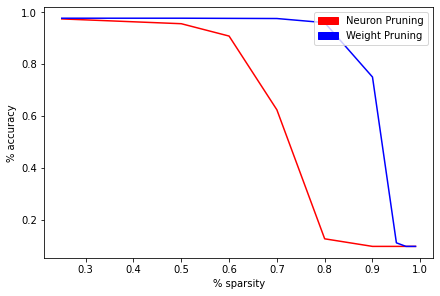

In [12]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
plt.rcParams['figure.constrained_layout.use'] = True
plt.xlabel('% sparsity')
plt.ylabel('% accuracy')
red_patch = mpatches.Patch(color='red', label='Neuron Pruning')
blue_patch = mpatches.Patch(color='blue',label='Weight Pruning')
plt.legend(handles=[red_patch,blue_patch],loc='upper right')
plt.plot([.25, .50, .60, .70, .80, .90, .95, .97, .99],accuracy_neurons,color='red')
plt.plot([.25, .50, .60, .70, .80, .90, .95, .97, .99],accuracy_weights,color='blue')
plt.show()

Train pruned model for 4 epochs

In [13]:
# restored_model = tf.keras.models.load_model("/tmp/tmp7nupdbpk_0.9.h5",compile=False)
# restored_model.compile(
#     loss=tf.keras.losses.categorical_crossentropy,
#     optimizer='adam',
#     metrics=['accuracy'])
# restored_model.fit(x_train, y_train,
#           batch_size=batch_size,
#           epochs=4,
#           verbose=1,
#           validation_data=(x_test, y_test))
# score = restored_model.evaluate(x_test, y_test, verbose=0)
# tf.keras.models.save_model(restored_model, '/tmp/pruned_retrained.h5', include_optimizer=False)
# print('Test loss:', score[0])
# print('Test accuracy:', score[1])

In [14]:
pruned_keras_files = files_neuron+files_weights
_, zip1 = tempfile.mkstemp('.zip') 
with zipfile.ZipFile(zip1, 'w', compression=zipfile.ZIP_DEFLATED) as f:
  f.write(model_file)
print("Size of the unpruned model before compression: %.2f Mb" % 
      (os.path.getsize(model_file) / float(2**20)))
print("Size of the unpruned model after compression: %.2f Mb" % 
      (os.path.getsize(zip1) / float(2**20)))

for pruned_keras_file in pruned_keras_files:
  _, zip2 = tempfile.mkstemp('.zip') 
  with zipfile.ZipFile(zip2, 'w', compression=zipfile.ZIP_DEFLATED) as f:
    f.write(pruned_keras_file)
  print("Size of the pruned model before compression: %.2f Mb" % 
        (os.path.getsize(pruned_keras_file) / float(2**20)))
  print("Size of the pruned model after compression: %.2f Mb" % 
        (os.path.getsize(zip2) / float(2**20)))



Size of the unpruned model before compression: 9.13 Mb
Size of the unpruned model after compression: 8.44 Mb
Size of the pruned model before compression: 9.13 Mb
Size of the pruned model after compression: 7.08 Mb
Size of the pruned model before compression: 9.13 Mb
Size of the pruned model after compression: 5.29 Mb
Size of the pruned model before compression: 9.13 Mb
Size of the pruned model after compression: 4.49 Mb
Size of the pruned model before compression: 9.13 Mb
Size of the pruned model after compression: 3.65 Mb
Size of the pruned model before compression: 9.13 Mb
Size of the pruned model after compression: 2.76 Mb
Size of the pruned model before compression: 9.13 Mb
Size of the pruned model after compression: 1.79 Mb
Size of the pruned model before compression: 9.13 Mb
Size of the pruned model after compression: 1.25 Mb
Size of the pruned model before compression: 9.13 Mb
Size of the pruned model after compression: 1.02 Mb
Size of the pruned model before compression: 9.13 M